#**Downloading the YouTube Video's Audio**

In [ ]:
! pip install pytube -q

In [ ]:
from pytube import YouTube

In [ ]:
URL = 'https://www.youtube.com/watch?v=tpmdvmcb6zQ'

In [ ]:
vid_id = URL.split("=")[1]

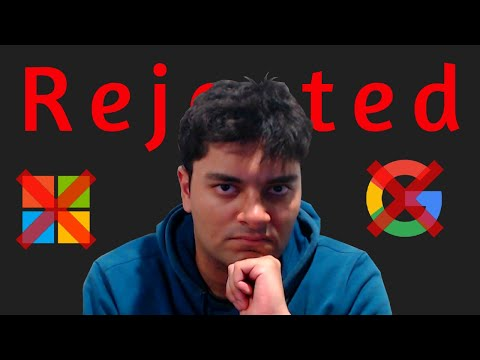

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(vid_id)

In [ ]:
yt = YouTube(URL)

In [ ]:
yt.streams \
  .filter(only_audio = True, file_extension = 'mp4') \
  .first() \
  .download(filename = 'audiofile.mp4')

'/content/audiofile.mp4'

In [ ]:
! ffmpeg -i audiofile.mp4 -acodec pcm_s16le -ar 16000 audiofile.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

#**English Speech to text model with HuggingSound**

In [ ]:
!pip install huggingsound -q

In [ ]:
from huggingsound import SpeechRecognitionModel


In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cuda'

In [ ]:
model = SpeechRecognitionModel("jonatasgrosman/wav2vec2-large-xlsr-53-english", device = device)


INFO:huggingsound.speech_recognition.model:Loading model...


#**Audio Chunking(To handle memory limitations in Colab )**

In [ ]:
import librosa

In [ ]:
input_file = '/content/audiofile.wav'

In [ ]:
print(librosa.get_samplerate(input_file))

# Stream over 30 seconds chunks rather than load the full file
stream = librosa.stream(
    input_file,
    block_length=30,
    frame_length=16000,
    hop_length=16000
)

16000


In [ ]:
import soundfile as sf


In [ ]:
for i,speech in enumerate(stream):
  sf.write(f'chunck{i}.wav', speech, 16000)

#**Speech to Text conversion**

In [ ]:
audio_path =[]
for a in range(i+1):
  audio_path.append(f'/content/chunck{a}.wav')

In [ ]:
transcripts = model.transcribe(audio_path)

100%|██████████| 8/8 [00:04<00:00,  1.62it/s]


In [ ]:
final_transcript = ' '

In [ ]:
for item in transcripts:
  final_transcript += ''.join(item['transcription'])

In [ ]:
len(final_transcript)

3828

#**Summarization Module setup**

In [ ]:
from transformers import pipeline

In [ ]:
summarization = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
summarized_text = summarization(final_transcript)

In [ ]:
summarized_text[0]['summary_text']

" i've actually failed st afewiguas not quite a few interviews because to be honest wasn't e given a lot of interviews but i like tell you guys y failure interview stories . The only other interviews i did were in college and the ones i failed were microsoft my microsoft interview you would not believe itit was a phone interview only got tohe phone interviewani was super-try-hearting leagu codi was like there's no way i'm goinna thi interview ."

#**Text Chunking(to avoid memory overflow in colab) And Summarization**

In [ ]:
num_iters = int(len(final_transcript)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + final_transcript[start:end])
  out = summarization(final_transcript[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)



input text 
 ifld my coding interview mi'm sorryfor what i's worth i've actually failed st afewiguas not quite a few interviews because to be honest wasn't e given a lot of interviews but i like tell you guys y failure interview stories so i did not o a tun of interview themain ones i did rpremuch back in college because i told you guys after i graduated i was unemployed could not get interviews for the life of me it was like twenty-twenty nobody was really hiring back down it was like the pandema the beginning osthe only interview iot wasike thegoogle one and i did pass that one obably nowbut the only other interviews i did were in collegeandthe ones i failed were microsoft my microsoft interview you would not believe itit was a phone interview only got tohe phone interviewani was super-try-hearting leagu codi was like there's no way i'm goinna thi interview sowas to be a thirty-minute phone call they didn't even give me a lot of information about itthe coding question was not even a 

In [ ]:
str(summarized_text)

'[" i\'ve actually failed st afewiguas not quite a few interviews because to be honest wasn\'t given a lot of interviews but i like tell you guys y failure interview stories so i did not o a tun of interview themain ones i did rpremuch back in college because i told you guys after i graduated i was unemployed could not get interviews for the life of me .", " iomeaidn\'t  code anything up it was just a phone interview that gui gave me a problem and i just had to talk through itndpoblem was pretty much this the tinyyuarall problem was more orless that problemthik ialready done this code problem bpretty much told him te solutiooproblem immediatelyio\'t now if he thought i was cheating or  was superrud by the way .", " i did very very well in the interview actually like their interview process it wasn\'t even like leadcodestyle interviews at least tit wasn\'t l superhard it was very reasonable uestionsthen ipremuch got past the technical round i had around itheither a recruiter or e  non-t